## Another attempt to solve problem

Actor critic method

We will consider the state 3-d vector 
$$ s_t = [p_t, x_t, t] $$
where $p_t$ is price at time t, $x_t$ stocks available to liquidate and $t$ is time.
We will consider the value function as the linear function as
$$V(s_t, \theta) = \theta_1\phi_1(p_t) + \theta_2\phi_2(x_t) + \theta_3\phi_3(t) + \theta_4 $$
Hence we need $\theta = [\theta_1,\theta_2,\theta_3,\theta_4] $ as parameters for value function.

Simlarlry we will consider the paramtric form of policy fiunction which will again depend on price, time, and avaibale stocks to sell, so similar function for the policy and vector of parameters go like $ \nu = [\nu_1,\nu_2,\nu_3,\nu_4] $

In [1]:
import numpy as np
import scipy as scp
import matplotlib.pyplot as plt
import math
% %matplotlib inline

In [2]:
def getNewState(s_t, u_t):
    s_ = [0,0,0]
    if u_t < 4 or s_t[0] < 3.0:
        s_[1] = max(s_t[1]-u_t, 0) 
        s_[0] = s_t[0]
    elif u_t <= 40:
        s_[0] = s_t[0]*(1-0.0008*u_t)
        s_[1] = max(s_t[1]-u_t, 0) 
    else:
        s_[0] = s_t[0]*(1- 0.01*np.log(u_t))
        s_[1] = max(s_t[1]-u_t, 0) 
    reward = u_t*s_[0]
    #print(reward, s_[0])
    s_[0] = s_[0] + np.random.normal(0,1)
    s_[2] = s_t[2] + 1
    #print(u_t)
    return (reward, s_)

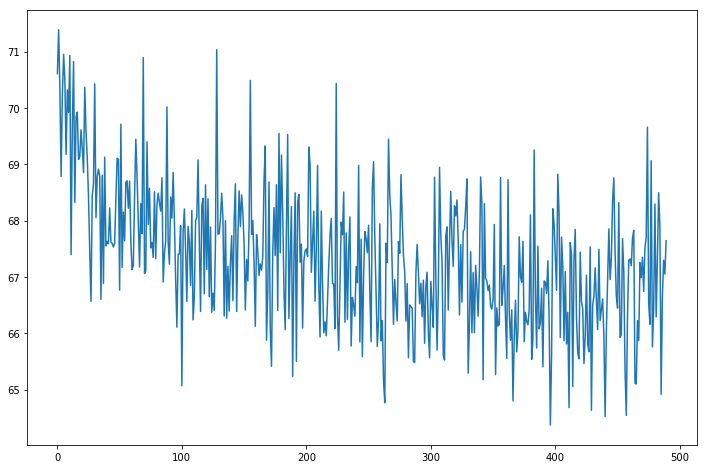

In [3]:
s_t = [71, 1000, 1]
prices = [getNewState(s_t, u_t)[1][0] for u_t in range(10, 500) ]
#print(prices)
plt.figure(figsize=(12,8))
plt.plot(prices)

In [4]:
def getAction(s_t, param):
    return (0.01*s_t[1]*s_t[0]*(1-np.exp(-np.sqrt(param/(T-np.sqrt(s_t[2]))))))/(T-(s_t[2]))

In [5]:
def getGradient(s_t, param):
    return 0.005*s_t[1]*s_t[0]*np.exp(-np.sqrt(param/(T-np.sqrt(s_t[2]))))/(math.pow(T-(s_t[2]), 1.5)*np.sqrt(param))

In [10]:
alpha_a = 0.01
alpha_c = 0.01
lammbda = 0.01

# lets initilize the parameterrs of policy as well as value function
param = np.random.random()
theta = np.random.random(3)
T = 20
for i in range(10000):
    z = [0.0,0.0,0.0] 
    # initialize the state s0
    s_t = [np.random.random()*100, int(np.random.random()*1000), 0]
    #print('u :',s_t[1])
    t = 0
    while t < T and s_t[1] > 0:
        if t == T-1:
            #u_t = s_t[1]
            delta_t = reward + s_t[0]*s_t[1] - np.dot(theta, s_t)
        else:
            u_t0 = np.random.normal(5,5)
            u_t = int(getAction(s_t, param) + u_t0)
            (reward, s) = getNewState(s_t, u_t)
            s__ = np.subtract(s , s_t)
            #s__[1] = s__[1]/1000 
            #s__[0] = s__[0]/1000
            #s__[2] = s__[2]/1000
            delta_t = reward + np.dot(theta,s__ )
            #print(delta_t, reward)
        #print(s, s_t)
        gad = getGradient(s_t, param)
        #print('gad\t', gad)
        param = param + alpha_a*delta_t*u_t0*gad
        z = [a/100 for a in s_t] + np.multiply(lammbda, z)
        #print('z\t', z)
        theta = theta + np.multiply(alpha_c*delta_t, z)      
        #print('theta\t', theta)
        s_t = s
        t = t+1
print(param, theta)

3.68706801999e+22 [ -7.87787557e+256   4.82443916e+256   4.02614295e+256]


In [14]:
def actionValue():
    u = [0 for i in range(20)]
    val = [0 for i in range(20)]
    prices = [0 for i in range(20)]
    T = 20
    #for i in range(1000):
    value = 0.0
    s_t = [np.random.random()*100, int(np.random.random()*1000), 1]
    #print(s_t[1])
    t = 0
    while t < T and s_t[1] > 0:
        if t == T-1:
            #u_t = s_t[1]
            val[t] = s_t[0]*s_t[1]
            u[t] = s_t[1]
        else:
            #u_t0 = np.random.normal(5,5)
            u[t] = int(getAction(s_t, param))
            (reward, s) = getNewState(s_t, u[t])
            val[t] = np.dot(s_t, theta)
            #print(u_t, value, s_t[0])
        prices[t] = s_t[0]
        s_t = s
        t = t + 1
    return (val, u, prices)

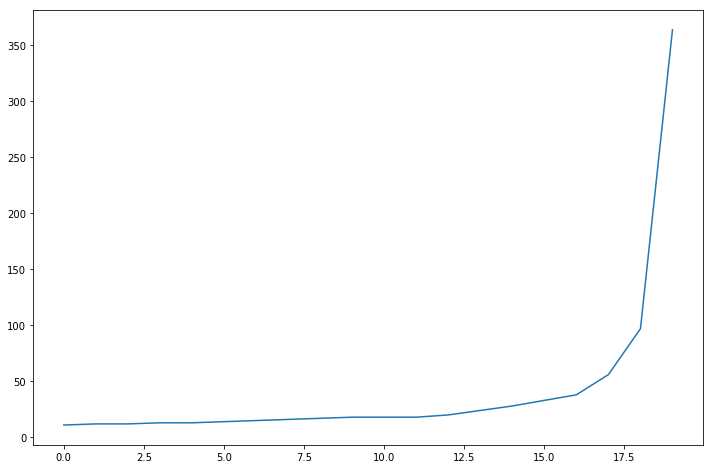

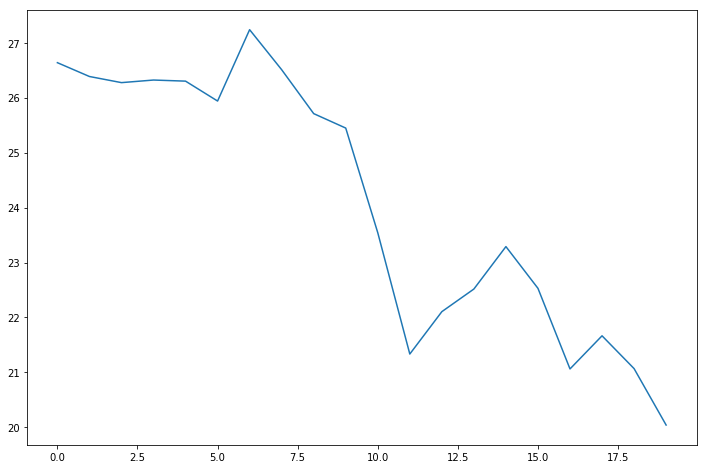

In [15]:
(val, u, price) = actionValue()
plt.figure(figsize=(12,8))
plt.plot(u)
plt.figure(figsize=(12,8))
plt.plot(price)

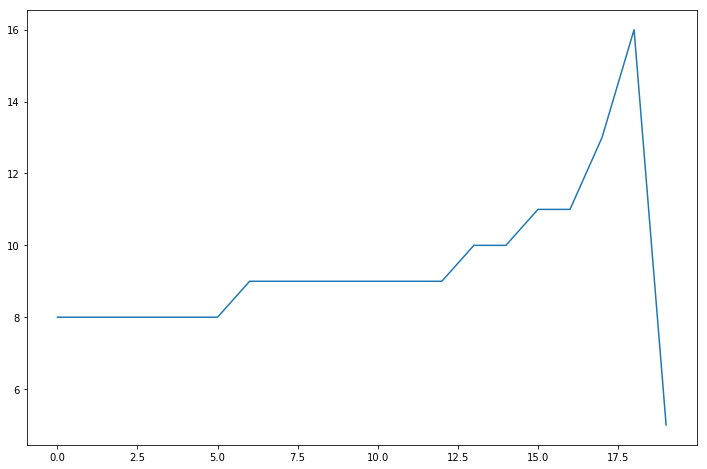

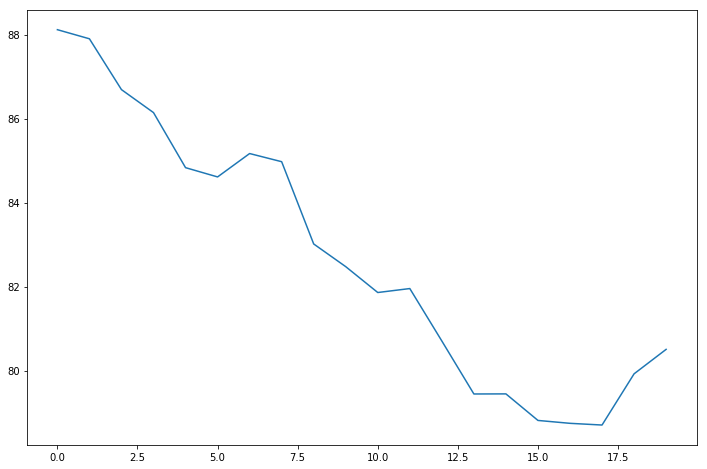

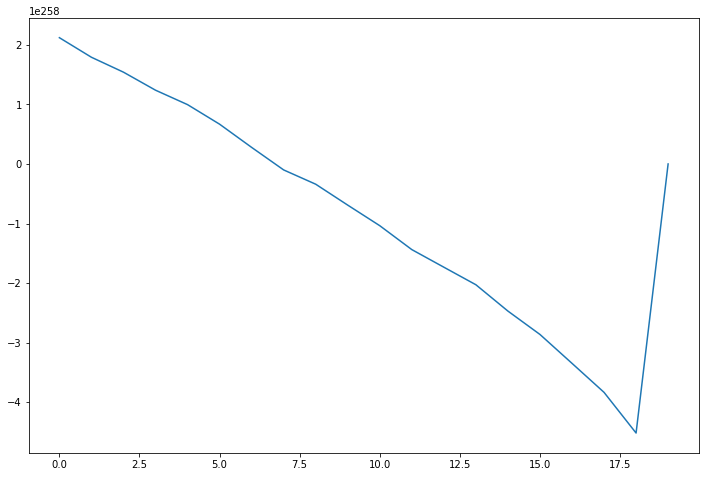

In [16]:
(val, u, price) = actionValue()
plt.figure(figsize=(12,8))
plt.plot(u)
plt.figure(figsize=(12,8))
plt.plot(price)
plt.figure(figsize=(12,8))
plt.plot(val)

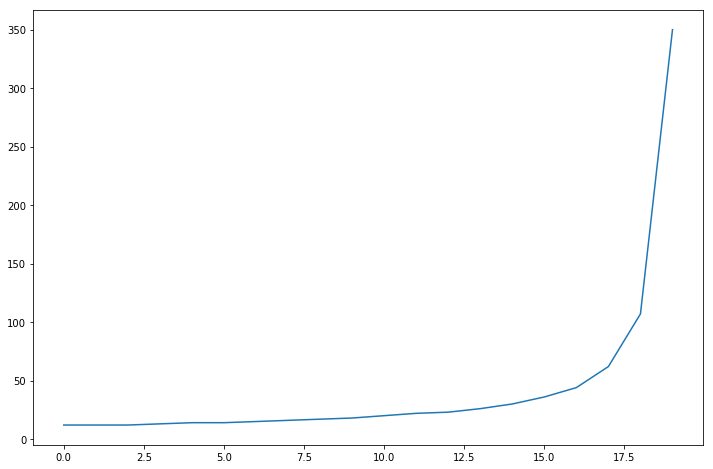

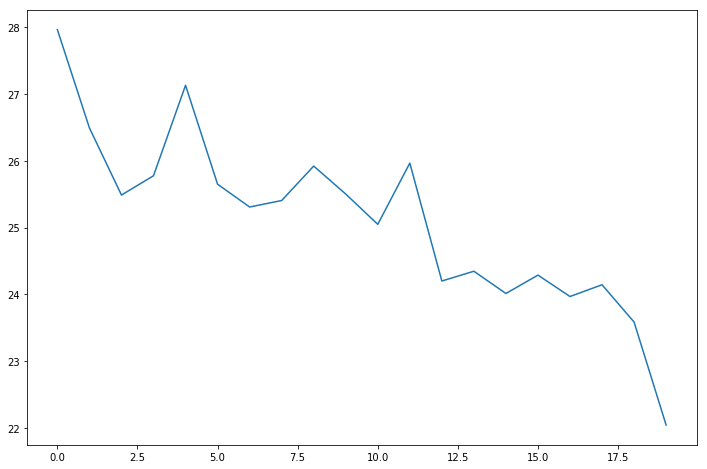

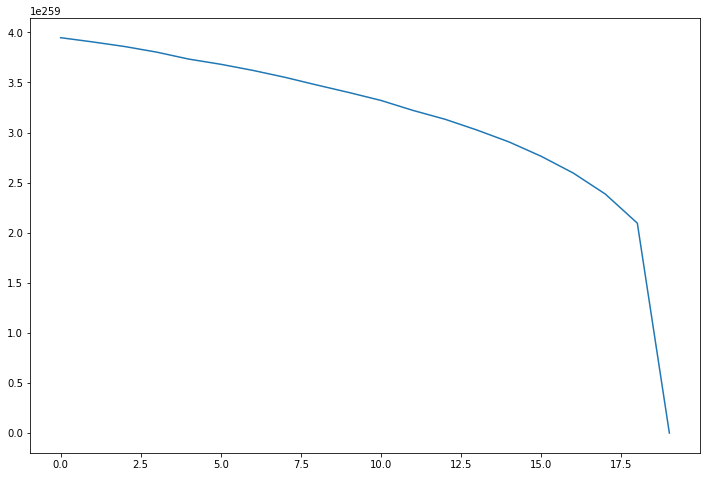

In [17]:
(val, u, price) = actionValue()
plt.figure(figsize=(12,8))
plt.plot(u)
plt.figure(figsize=(12,8))
plt.plot(price)
plt.figure(figsize=(12,8))
plt.plot(val)

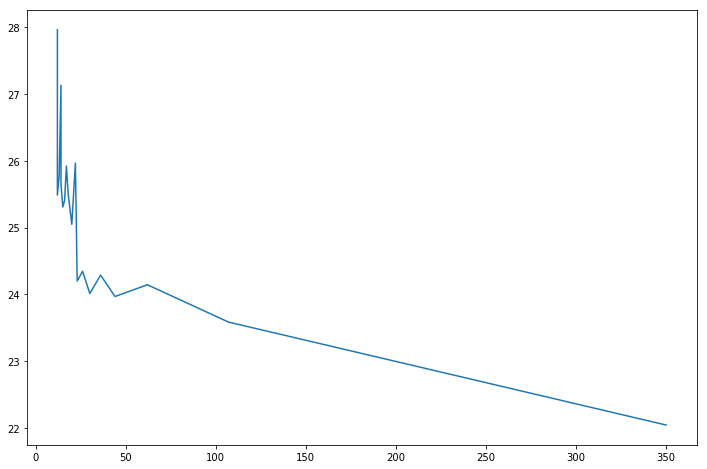

In [21]:
plt.figure(figsize=(12,8))
plt.plot(u, price)

In [23]:
print(price)

[27.96314485660607, 26.492258116378135, 25.487070769348882, 25.775763850152202, 27.130728530040052, 25.649355328386566, 25.307938106730653, 25.40508777837169, 25.920878536281037, 25.50242260458579, 25.048308373424177, 25.96555979870564, 24.199853854525262, 24.34633221206071, 24.012822482998327, 24.288185862207243, 23.967728357364766, 24.143533900032228, 23.584925698216722, 22.043164262108011]


In [24]:
print(u)


[12, 12, 12, 13, 14, 14, 15, 16, 17, 18, 20, 22, 23, 26, 30, 36, 44, 62, 107, 350]


Ref : Solutions to Finite Horizon Cost Problems Using Actor-Critic Reinforcement Learning Ivo Grondman et. al

http://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=6706755

In [25]:
print(val)

[3.9472269661751795e+259, 3.9049473018707008e+259, 3.8589989156919096e+259, 3.8028575004955595e+259, 3.7334916911493733e+259, 3.6816457595540052e+259, 3.6208193965888532e+259, 3.5517136190430118e+259, 3.4744853999449562e+259, 3.3997926208580322e+259, 3.3205563142528663e+259, 3.2208676813111508e+259, 3.1326661743660716e+259, 3.0245762782537151e+259, 2.9057943510705665e+259, 2.7629180406419404e+259, 2.5957888980143895e+259, 2.3861547435299581e+259, 2.0954663041812209e+259, 7715.1074917378037]
